In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue
import pandas as pd

In [12]:
ccurves = load_and_analyze([
        ('30', 30),
        ('65', 65)],
        1,
        area=26,
        formatter='../messungen/191114_OM_VB/4_{}.dat'.format,
        columns=['desc', 'curve', 'area', 'j_c', 'u_cc'])


In [14]:
ccurves['j_c']

30    0.001202
65    0.001254
Name: j_c, dtype: float64

In [10]:
ucs = np.array([[30, 35, 40, 45, 50, 55, 60, 65],
                [575, 570, 563, 555, 547, 536, 525, 512]])


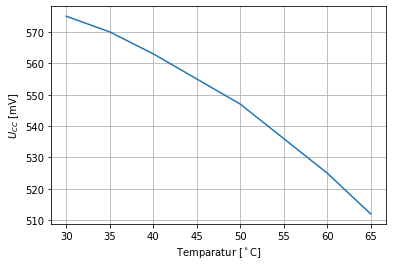

In [105]:
plt.plot(*ucs)
plt.xlabel(r'Temparatur [$^\circ$C]')
plt.ylabel(r'$U_{CC}$ [mV]')
plt.grid()

In [26]:
angles = pd.read_excel('../messungen/winkel.xlsx')

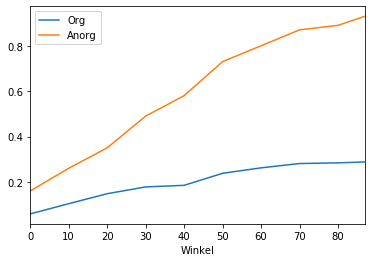

In [29]:
angles.plot(x='Winkel')

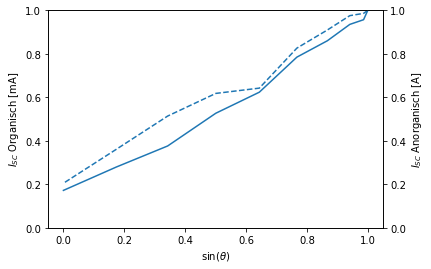

In [63]:
fig, ax1 = plt.subplots()

ax1.plot(np.sin(angles['Winkel']/180*np.pi), angles['Org']/angles['Org'].max(), label='Organisch', linestyle='--')
ax1.set_ylabel('$I_{SC}$ Organisch [mA]')
ax1.set_xlabel(r'$\sin(\theta)$')
ax1.set_ylim([0,1])
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax2 = ax1.twinx()
ax2.set_ylim([0,1])
ax2.set_ylabel('$I_{SC}$ Anorganisch [A]')
ax2.plot(np.sin(angles['Winkel']/180*np.pi), angles['Anorg']/angles['Anorg'].max(), label='Anorganisch',)


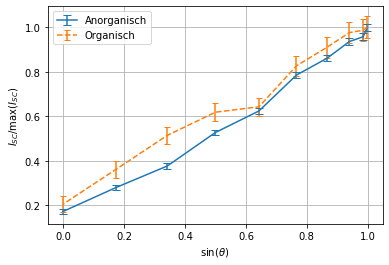

In [107]:
fig, ax1 = plt.subplots()
rel = SecondaryValue('i/m')
org = rel(m=(angles['Org'].max(), 0.01), i=(angles['Org'], .01))
anorg = rel(m=(angles['Anorg'].max(), 0.01), i=(angles['Anorg'], .01))
ax1.set_ylabel('$I_{SC}/\max({I_{SC}})$')
ax1.set_xlabel(r'$\sin(\theta)$')
ax1.errorbar(np.sin(angles['Winkel']/180*np.pi), anorg[0], yerr=anorg[1], label='Anorganisch', capsize=4)
ax1.errorbar(np.sin(angles['Winkel']/180*np.pi), org[0], yerr=org[1], label='Organisch', linestyle='--', capsize=3)
ax1.legend()
ax1.grid()
save_fig(fig, 'E/relativ.pdf')

In [70]:
relangles

(array([1.        , 0.98611111, 0.97569444, 0.90972222, 0.82638889,
        0.64236111, 0.61805556, 0.51388889, 0.36111111, 0.20486111]),
 array([0.04910464, 0.04876483, 0.04851155, 0.04694047, 0.04504422,
        0.04126876, 0.04081881, 0.03903868, 0.03691678, 0.03544335]))